In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/raw/1/ecdc", index_col=0)
display(df.head())
display(df.describe())
print(df.info())

,Distribution,Unit,Time,RegionCode,RegionName,Category,Value,Bacteria,Antibiotic
0,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,0-4,0.000000,Acinetobacter spp.,Aminoglycosides
1,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,5-18,100.000000,Acinetobacter spp.,Aminoglycosides
2,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,19-64,62.857143,Acinetobacter spp.,Aminoglycosides
3,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,65+,56.521739,Acinetobacter spp.,Aminoglycosides
4,"R - resistant isolates proportion, by age",%,2012,CY,Cyprus,0-4,33.333333,Acinetobacter spp.,Aminoglycosides


,Time,Value
count,64386.000000,64386.000000
mean,2011.023949,17.850871
std,4.704133,23.939143
min,2000.000000,0.000000
25%,2007.000000,0.000000
50%,2011.000000,7.692308
75%,2015.000000,25.000000
max,2018.000000,100.000000


<class 'pandas.core.frame.DataFrame'>
Index: 64386 entries, 0 to 64385
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Distribution  64386 non-null  object 
 1   Unit          64386 non-null  object 
 2   Time          64386 non-null  int64  
 3   RegionCode    64386 non-null  object 
 4   RegionName    64386 non-null  object 
 5   Category      64386 non-null  object 
 6   Value         64386 non-null  float64
 7   Bacteria      64386 non-null  object 
 8   Antibiotic    64386 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.9+ MB
None


In [25]:
bacteria = "Escherichia coli"  # change as needed
antibiotic = "Fluoroquinolones"
mask = (df['Bacteria'] == bacteria) & (df['Antibiotic'] == antibiotic)

df_sub = df[mask]

display(df_sub.describe())
print(df_sub.info())


,Time,Value
count,2895.000000,2895.000000
mean,2009.770294,17.190805
std,5.144768,12.964754
min,2000.000000,0.000000
25%,2005.000000,7.843137
50%,2010.000000,15.384615
75%,2014.000000,25.000000
max,2018.000000,100.000000


<class 'pandas.core.frame.DataFrame'>
Index: 2895 entries, 27634 to 30528
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Distribution  2895 non-null   object 
 1   Unit          2895 non-null   object 
 2   Time          2895 non-null   int64  
 3   RegionCode    2895 non-null   object 
 4   RegionName    2895 non-null   object 
 5   Category      2895 non-null   object 
 6   Value         2895 non-null   float64
 7   Bacteria      2895 non-null   object 
 8   Antibiotic    2895 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 226.2+ KB
None


## Trend (Europe-wide)


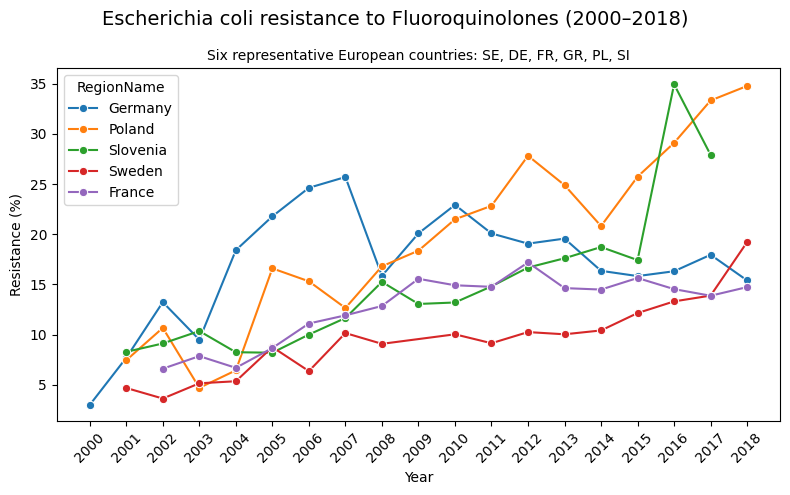

In [41]:
countries = ["Sweden", "Germany", "France", "Greece", "Poland", "Slovenia"]
trend = df_sub[df_sub['RegionName'].isin(countries)]
trend_grouped = trend.groupby(['Time', 'RegionName'])['Value'].mean().reset_index()

labels = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
main_title = f"{bacteria} resistance to {antibiotic} (2000–2018)"
subtitle = "Six representative European countries: SE, DE, FR, GR, PL, SI"

plt.figure(figsize=(8,5))
sns.lineplot(data=trend_grouped, x='Time', y='Value', hue='RegionName', marker='o')
plt.suptitle(main_title, fontsize=14)
plt.title(subtitle, fontsize=10)
plt.ylabel("Resistance (%)")
plt.xticks(labels, rotation=45)
plt.xlabel("Year")
plt.tight_layout()


## Europe-wide comparison for latest year (2018)

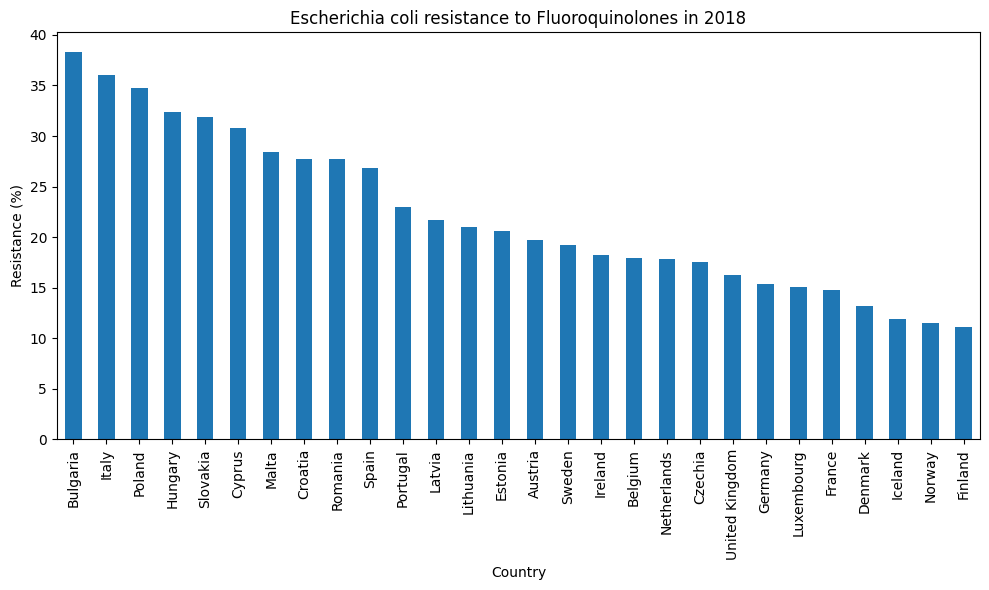

In [43]:
year = 2018
bar = df_sub[df_sub['Time'] == year].groupby('RegionName')['Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bar.plot(kind='bar')
plt.title(f"{bacteria} resistance to {antibiotic} in {year}")
plt.ylabel("Resistance (%)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()